#### Randomized Treap Implementation

Implementation of a basic randomized treap. Nodes are assigned priority values uniformly at random from $[0,1]$ 

In [133]:
from graphviz import Digraph, Source

class Node:
    def __init__(self, data, key, priority, parent=None):
        self.data = data
        self.key = key
        self.priority = priority
        self.parent = parent
        self.left = None
        self.right = None
        

class Treap:
    def __init__(self, root=None): 
        self.root = root
        self.size = 0

    def compute_height(self):
        # perform BFS to compute the height of the tree
        if self.root is None:
            return 0
        else:
            height = 0
            queue = [self.root]
            while len(queue) > 0:
                level = []
                for node in queue:
                    if node.left is not None:
                        level.append(node.left)
                    if node.right is not None:
                        level.append(node.right)
                queue = level
                height += 1
            return height


    def insert(self, data, key, priority):
        #print(f"Inserting key: {key} with priority: {priority}")
        if self.root is None:
            self.root = Node(data, key, priority)
        else:
            # traverse the tree to find the correct position for the new node
            current = self.root
            while True:
                if key == current.key:
                    raise ValueError("Key already exists!") 
                elif key < current.key:
                    if current.left is None:
                        new_node = Node(data, key, priority, current)
                        current.left = new_node
                        break
                    current = current.left
                else:
                    if current.right is None:
                        new_node = Node(data, key, priority, current)
                        current.right = new_node
                        break
                    current = current.right
            # fix heap property violation
            self.restore_heap_insert(new_node)

        self.size += 1    


    def delete(self, key):
        # perform binary search to find the node with the given key
        current = self.root
        while current is not None:
            if key == current.key:
                break
            elif key < current.key:
                current = current.left
            else:
                current = current.right

        if current is None:
            raise ValueError("Key not found!")
        else:
            #print(f"Deleting key: {key}")
            # set the priority of the node to infinity
            current.priority = float('inf')
            # fix heap property violation
            self.restore_heap_delete(current)   
            # remove the node from the tree
            parent = current.parent
            current.parent = None
            if parent is not None:
                if parent.left == current:
                    parent.left = None
                else:
                    parent.right = None

        self.size -= 1            


    def restore_heap_insert(self, node):    
        #print(f"Node priority: {node.priority}, parent priority: {node.parent.priority if node.parent else None}")
        # check for min-heap property violation
        while node != self.root and (node.priority < node.parent.priority):
            #print(f"Node {node.key} violates heap property")
            if node == node.parent.left:
                # node is a left child, perform right rotation
                #print(f"Performing right rotation on node {node.key}")
                self.rotate_right(node.parent)
            else:
                # node is a right child, perform left rotation
                #print(f"Performing left rotation on node {node.key}")
                self.rotate_left(node.parent)


    def restore_heap_delete(self, node):    
        #print(f"Node priority: {node.priority}, parent priority: {node.parent.priority if node.parent else None}")
        # perform rotations to bring node down to leaf level
        while node.left is not None or node.right is not None:
            # find child with the smallest priority
            if node.left is not None and node.right is not None:
                if node.left.priority < node.right.priority:
                    # perform right rotation if left child has smaller priority
                    #print(f"Performing right rotation on node {node.key}")
                    self.rotate_right(node)
                else:
                    # perform left rotation otherwise
                    #print(f"Performing left rotation on node {node.key}")
                    self.rotate_left(node)
            elif node.left is not None:
                # perform right rotation if node only has a left child 
                #print(f"Performing right rotation on node {node.key}")
                self.rotate_right(node)
            else:
                # perform left rotation if node only has a right child
                #print(f"Performing left rotation on node {node.key}")
                self.rotate_left(node)


    def rotate_right(self, u):
        """
             u
            /  \
           v    z
          / \ 
         x   y

        Perform right rotation on node

                v
              /   \
             x     u
                  / \ 
                 y   z
        """
        parent = u.parent
        v = u.left
        y = v.right
        # perform right rotation
        v.right = u
        u.left = y
        u.parent = v
        v.parent = parent
        if parent is not None:
            if parent.left == u:
                parent.left = v
            else:
                parent.right = v
        else:
            self.root = v        


    def rotate_left(self, v):
        """
              v
            /   \
            x    u
                / \ 
               y   z

        Perform right rotation on node

             u
            /  \
           v    z
          / \ 
         x   y
        """
        parent = v.parent
        u = v.right
        y = u.left
        # perform left rotation
        u.left = v
        v.right = y
        v.parent = u
        u.parent = parent
        if parent is not None:
            if parent.left == v:
                parent.left = u
            else:
                parent.right = u
        else:
            self.root = u        

    def find(self, key):
        # perform binary search to find the node with the given key
        current = self.root
        while current is not None:
            if key == current.key:
                return current
            elif key < current.key:
                current = current.left
            else:
                current = current.right
        return None     
    

    def split(self, key):
        raise NotImplementedError("Split operation not implemented yet!")
    
    def join(self, treap_left, treap_right):
        raise NotImplementedError("Join operation not implemented yet!")



def add_nodes_edges(graph, node, counter=0):
    if node is not None:
        root = str(counter)
        graph.node(root, str((node.key, node.priority)))
        if node.left is not None:
            left = str(counter + 1)
            graph.edge(root, left)
            counter = add_nodes_edges(graph, node.left, counter + 1)
        if node.right is not None:
            right = str(counter + 1)
            graph.edge(root, right)
            counter = add_nodes_edges(graph, node.right, counter + 1)
    return counter

def visualize_tree(root):
    graph = Digraph()
    add_nodes_edges(graph, root)
    return Source(graph.source)                   

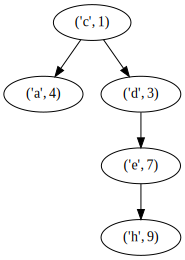

In [134]:
# create treap
treap = Treap()
treap.insert(0, 'd', 3)
treap.insert(0, 'a', 4)
treap.insert(0, 'e', 7)
treap.insert(0, 'h', 9)
treap.insert(0, 'c', 1)

# visualize the tree
src = visualize_tree(treap.root)
src

Node with key 'e': e, priority: 7


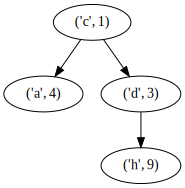

In [135]:
# find node with key 'e'
node = treap.find('e')
print(f"Node with key 'e': {node.key}, priority: {node.priority}")

# delete node with key 'c'
treap.delete('e')

# visualize the tree
src = visualize_tree(treap.root)
src

In [136]:
import random, math

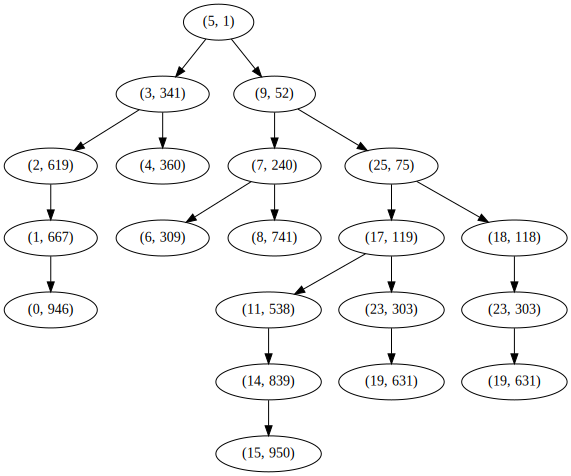

In [137]:
# now lets create a larger treap
treap = Treap()
keys = list(range(30))
random.shuffle(keys)

for key in keys:
    # draw uniform random priority
    priority = random.randint(0, 1000)
    treap.insert(0, key, priority)


# visualize the tree
src = visualize_tree(treap.root)
src    

In [138]:
# find tree height
height = treap.compute_height()
print(f"Treap height: {height}, Tree size: {treap.size}, Log2(size): {math.log2(treap.size)}")

Treap height: 7, Tree size: 30, Log2(size): 4.906890595608519


#### `Experiment`: Let's create multiple ensembles of randomized treap with varying treap sizes $N$ and see if the average height follows the theoretical $log(N)$ upper-bound. 

In [169]:
N = [100,500, 1000, 2000, 5000, 10000]
num_treaps = 500

average_heights = []

for num_nodes in N:
    heights = []
    for _ in range(num_treaps):        
        treap = Treap()
        keys = list(range(num_nodes))
        random.shuffle(keys)

        for key in keys:
            # draw uniform random priority between [0,1)
            priority = random.random()
            treap.insert(0, key, priority)

        heights.append(treap.compute_height())
        
    average_heights.append(sum(heights) / num_treaps)
    print(f"Average height of {num_treaps} treaps with {num_nodes} nodes: {average_heights[-1]}, Log2(N): {math.log2(num_nodes)}")    


Average height of 500 treaps with 100 nodes: 10.902, Log2(N): 6.643856189774724
Average height of 500 treaps with 500 nodes: 15.126, Log2(N): 8.965784284662087
Average height of 500 treaps with 1000 nodes: 16.758, Log2(N): 9.965784284662087
Average height of 500 treaps with 2000 nodes: 18.852, Log2(N): 10.965784284662087
Average height of 500 treaps with 5000 nodes: 21.574, Log2(N): 12.287712379549449
Average height of 500 treaps with 10000 nodes: 23.74, Log2(N): 13.287712379549449


Text(0, 0.5, 'Avg[h]')

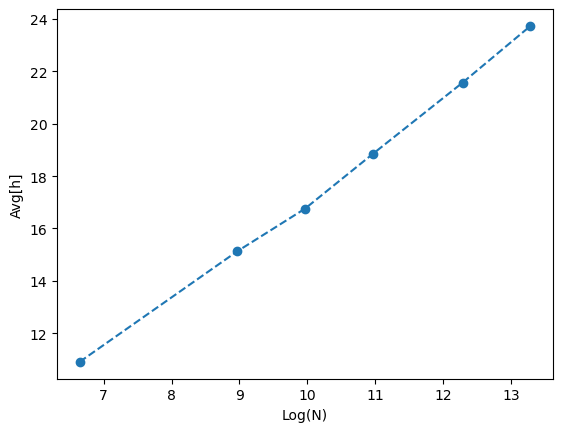

In [178]:
# create a plot of the average height vs. log(N)
import matplotlib.pyplot as plt

plt.plot([math.log2(n) for n in N], average_heights, label='Average Height', marker='o', linestyle='--')
plt.xlabel('Log(N)')
plt.ylabel('Avg[h]')

#### We have an approximately linear relationship between the average height and $log(N)$ which is consistent with the theoretical expected height.